<a href="https://colab.research.google.com/github/rvalarezo/data_analytics/blob/main/Midterm_Robero_Valarezo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1.- Calculate the percentage of missing values in each column.

In [8]:
titanic_data.isnull().sum()/len(titanic_data)*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


2.- Handle missing values if any are present by either filling or dropping them.

In [10]:
#There are empty data on columns: age,embark_town and deck
#Im using the median to fill ages
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
#For embarked town as is categorical im using the mode to fill the data
titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0], inplace=True)
#At last the majority of the rows doesnt contain deck , so im dropping the entire column
titanic_data.drop('deck', axis=1, inplace=True)

In [11]:
titanic_data.isnull().sum()/len(titanic_data)*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,0.000000
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


3.- Generate summary statistics for both numerical and categorical columns.

In [13]:
# for numrical columns
titanic_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#for categorical columms
titanic_data.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,891,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,646,549


4.-Plot a histogram to observe the distribution of the age column.

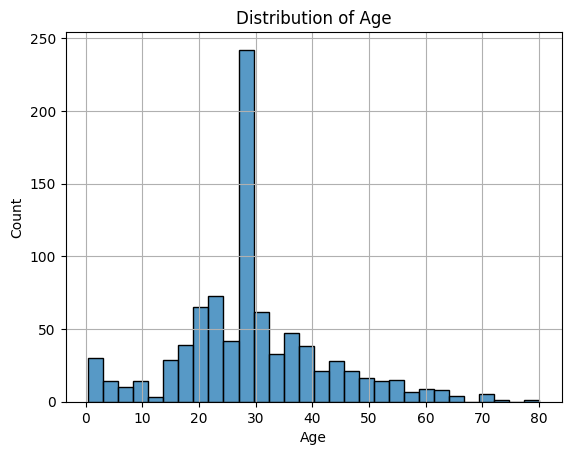

In [15]:
sns.histplot(titanic_data["age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid()
plt.show()

5.- Use a boxplot to identify outliers in the fare and age columns.

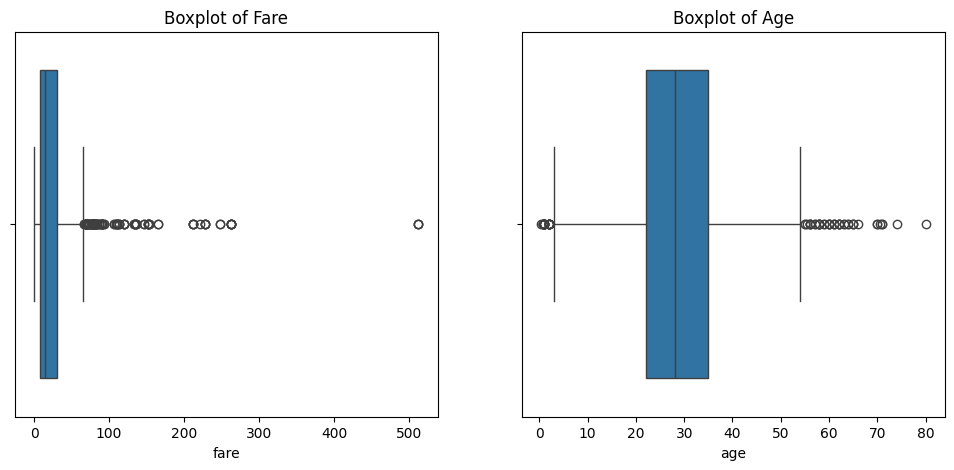

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=titanic_data["fare"])
plt.title("Boxplot of Fare")
plt.subplot(1, 2, 2)
sns.boxplot(x=titanic_data["age"])
plt.title("Boxplot of Age")
plt.show()


6.-Calculate and visualize the correlation between numerical columns using a heatmap.

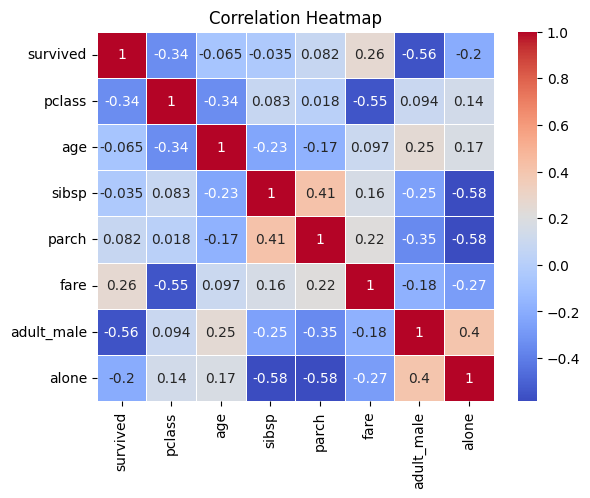

In [22]:
sns.heatmap(titanic_data.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

7.- Find the average fare for each class and compare across categories.

In [23]:
titanic_data.groupby("class")["fare"].mean()


,fare
class,
First,84.154687
Second,20.662183
Third,13.675550


8.- Create a scatter plot to visualize the relationship between fare and age.


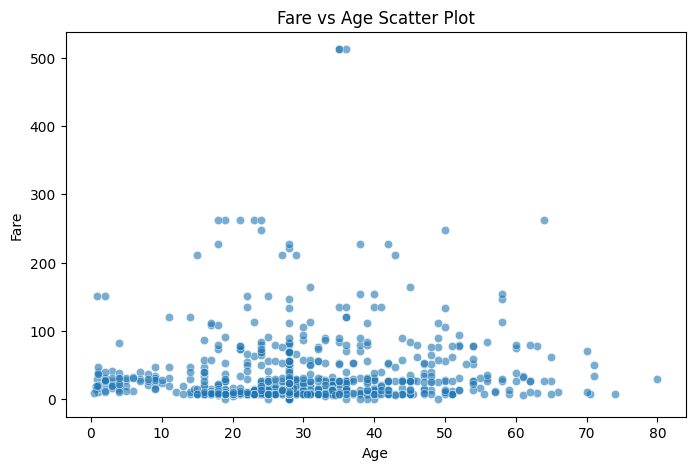

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=titanic_data["age"], y=titanic_data["fare"], alpha=0.6)
plt.title("Fare vs Age Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()